In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f(x):
    #return 1/(x**3 + x + 10)
    
    return np.exp(x)

In [3]:
def true_f(x):
    #return np.log(x + 2)/13 - np.log(x**2 - 2*x + 5)/26 + 3*np.arctan((x - 1)/2)/26;
    return np.exp(x)

In [4]:
a = -1.
b = 1.
n = 100
N = n + 1

In [5]:
x = np.linspace(a, b, N)
y = f(x)

In [6]:
string = []

In [7]:
with open('integr.txt', 'r') as file:
    for item in enumerate(file):
        string.append(item[1])

In [8]:
string

['0.203876/It is left\n',
 '0.203376/It is right\n',
 '0.203626/It is Trap\n',
 '0.202542/It is Simps\n']

In [9]:
for k in range(4):
    string[k] = string[k].split('/')

In [10]:
string

[['0.203876', 'It is left\n'],
 ['0.203376', 'It is right\n'],
 ['0.203626', 'It is Trap\n'],
 ['0.202542', 'It is Simps\n']]

In [11]:
sumL = np.double(string[0][0])
sumR = np.double(string[1][0])
sumT = np.double(string[2][0])
sumS = np.double(string[3][0])

In [12]:
sumTrue = true_f(b) - true_f(a)

In [13]:
erR = abs(sumTrue - sumR)
erL = abs(sumTrue - sumL)
erT = abs(sumTrue - sumT)
erS = abs(sumTrue - sumS)

# Вот ошибки численного интегрирования в сравнении с точным  интегралом

In [14]:
print(erL)

2.1465263872876026


In [15]:
print(erR)

2.1470263872876028


Странно, что у метода трапеций ошибка больше, чем у правых прямоугольников.

In [16]:
print(erT)

2.146776387287603


In [17]:
print(erS)

2.1478603872876025


# Теперь напишем то же, но на питоне

In [18]:
def intR(x, n):
    sum = 0;
    h = x[1] - x[0]
    for i in range(n + 1):
        sum += h * f(x[i + 1])
    return sum;

In [19]:
def intL(x, n):
    sum = 0;
    h = x[1] - x[0]
    for i in range(n + 1):
        sum += h *  f(x[i])
    return sum;

In [20]:
def intC(x, n):
    sum = 0;
    h = x[1] - x[0]
    for i in range(n + 1):
        sum += (h/2) *  f((x[i+1] +x[i])/2)
    return sum;

In [21]:
def intT(x, n):
    sum = 0;
    h = x[1] - x[0]
    for i in range(n + 1):
        sum += (h/2) * (f(x[i + 1]) + f(x[i]))
    return sum;

In [22]:
def intS(x, n):
    sum = 0;
    mid = (x[-1] + x[0])/2
    h = x[1] - x[0]
    for i in range(n + 1):
        sum += (h/6) * (f(x[i + 1]) + 4*f(mid) + f(x[i]))
    return sum;

In [23]:
y_L = np.zeros(N)
y_R = np.zeros(N)
y_C = np.zeros(N)
y_T = np.zeros(N)
y_S = np.zeros(N)
y_true = np.zeros(N)

In [24]:
for i in range(n):
    y_L[i] = intL(x, i)
for i in range(n):
    y_R[i] = intR(x, i)
for i in range(n):
    y_C[i] = intC(x, i)
for i in range(n):
    y_T[i] = intT(x, i)
for i in range(n):
    y_S[i] = intS(x, i)
for i in range(n):
    y_true[i] = true_f(x[i])

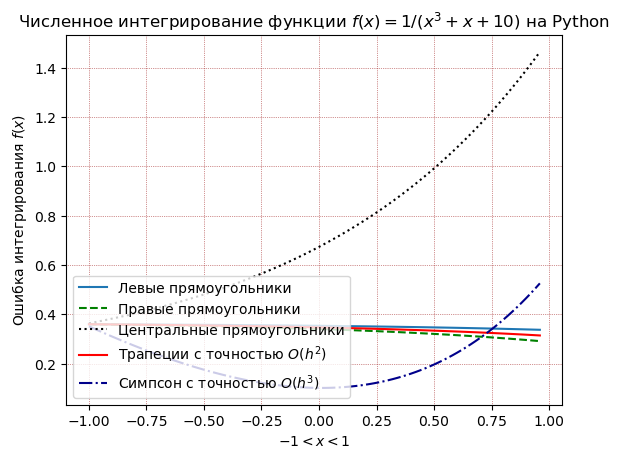

In [25]:
plt.plot(x[:99], abs(y_true - y_L)[:99], label = 'Левые прямоугольники')
plt.plot(x[:99], abs(y_true - y_R)[:99], ls = '--', color = 'green', label = 'Правые прямоугольники')
plt.plot(x[:99], abs(y_true - y_C)[:99], ls = ':', color = 'black', label = 'Центральные прямоугольники')
plt.plot(x[:99], abs(y_true - y_T)[:99], ls = '-', color = 'red', label = 'Трапеции с точностью $O(h^2)$')
plt.plot(x[:99], abs(y_true - y_S)[:99], ls = '-.', color = 'darkblue', label = 'Симпсон с точностью $O(h^3)$')
plt.title('Численное интегрирование функции $f(x) = 1/(x^3 + x + 10)$ на Python')
plt.xlabel('$-1 < x < 1$')
plt.ylabel('Ошибка интегрирования $f(x)$')
plt.grid(color = 'brown', ls = ":", lw = 0.5)
#plt.text(12, 0, "Computational complexity is $O(N^3)$", fontsize =12)
plt.legend(loc = 3)

# В сухом остатке, суммарная ошибка интегрирования:

Левые прямоугольники

In [41]:
abs(sumTrue - intL(x, n - 1))

0.023425677648937437

Правые прямоугольники

In [36]:
abs(sumTrue - intR(x, n - 1))

0.023582370096814742

Центральные прямоугольники

In [37]:
abs(sumTrue - intC(x, n - 1))

1.1752207801018524

Трапеции

In [38]:
abs(sumTrue - intT(x, n - 1))

7.834622393820823e-05

Формула Симпсона

In [40]:
abs(sumTrue - intS(x, n - 1))

0.23357547611708762